<a href="https://colab.research.google.com/github/KodumuruRaja/Ensemble-Algorithms/blob/main/Gradient-Boosting%20Classifier%20and%20Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# explore gradient boosting ensemble number of samples effect on performance
from numpy import mean,std,arange
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib import pyplot

In [ ]:
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
	return X, y

In [ ]:
def get_models():
	models = dict()
	# explore sample ratio from 10% to 100% in 10% increments
	for i in arange(0.1, 1.1, 0.1):
		key = '%.1f' % i
		models[key] = GradientBoostingClassifier(subsample=i)
	return models

In [ ]:
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

In [ ]:
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()

In [ ]:
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>0.1 0.869 (0.037)
>0.2 0.894 (0.031)
>0.3 0.896 (0.028)
>0.4 0.906 (0.029)
>0.5 0.903 (0.033)
>0.6 0.909 (0.030)
>0.7 0.904 (0.027)
>0.8 0.908 (0.032)
>0.9 0.905 (0.030)
>1.0 0.899 (0.030)


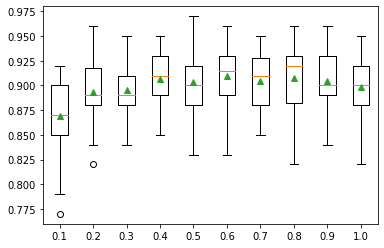

In [ ]:
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
# gradient boosting ensemble for making predictions for regression
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=7)
# define the model
model = GradientBoostingRegressor()
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [0.20543991, -0.97049844, -0.81403429, -0.23842689, -0.60704084, -0.48541492, 0.53113006, 2.01834338, -0.90745243, -1.85859731, -1.02334791, -0.6877744, 0.60984819, -0.70630121, -1.29161497, 1.32385441, 1.42150747, 1.26567231, 2.56569098, -0.11154792]
yhat = model.predict([row])
# summarize prediction
print('Prediction: %d' % yhat[0])

Prediction: 37


In [ ]:
# evaluate gradient boosting ensemble for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=7)
# define the model
model = GradientBoostingRegressor()
# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -62.468 (3.243)
